In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from imblearn.under_sampling import NearMiss 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef, accuracy_score 
import itertools
import seaborn as sns
SEED=42

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data/cleaned_final.csv').reset_index(drop=True)

In [ ]:
data.head()

,Claimant Age,Number Dependents,Weekly Wage,Percent Impairment,Post Injury Weekly Wage,Surgery Flag,Neurology Payment Flag,Neurosurgery Payment Flag,Dentist Payment Flag,Orthopedic Surgery Payment Flag,Psychiatry Payment Flag,Hand Surgery Payment Flag,Optometrist Payment Flag,Podiatry Payment Flag,HCPCS A Codes,HCPCS B Codes,HCPCS C Codes,HCPCS D Codes,HCPCS E Codes,HCPCS F Codes,HCPCS G Codes,HCPCS H Codes,HCPCS I Codes,HCPCS J Codes,HCPCS K Codes,HCPCS L Codes,HCPCS M Codes,HCPCS N Codes,HCPCS O Codes,HCPCS P Codes,HCPCS Q Codes,HCPCS R Codes,HCPCS S Codes,HCPCS T Codes,HCPCS U Codes,HCPCS V Codes,HCPCS W Codes,HCPCS X Codes,HCPCS Y Codes,HCPCS Z Codes,...,Accident Type Group num_5,Accident Type Group num_1,Accident Type Group num_7,Accident Type Group num_2,Accident Type Group num_8,Accident Type Group num_4,Accident Type Group num_3,Accident Type Group num_9,Accident Type Group num_10,Accident Type Group num_11,Accident Type Group num_12,Accident Type Group num_15,Accident Type Group num_14,Accident Type Group num_13,Accident Type Group num_16,Industry ID_14,Industry ID_13,Industry ID_16,Industry ID_7,Industry ID_10,Industry ID_8,Industry ID_12,Industry ID_17,Industry ID_15,Industry ID_18,Industry ID_6,Industry ID_9,Industry ID_5,Industry ID_4,Industry ID_2,Industry ID_3,Industry ID_11,Industry ID_19,Industry ID_20,Industry ID_0,Industry ID_1,Claimant Age squared,Weekly Wage squared,Claimant Age cubic,Weekly Wage cubic
0,41,0,513.86,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1681,264052.1,68921,1.356858e+08
1,49,0,1186.00,10,0.0,0,0,0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2401,1406596.0,117649,1.668223e+09
2,35,0,300.00,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1225,90000.0,42875,2.700000e+07
3,30,0,600.00,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,900,360000.0,27000,2.160000e+08
4,41,0,385.07,6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1681,148278.9,68921,5.709776e+07


In [5]:
data2 = data.drop(columns=['Opiods Used'])
names = data2.columns.tolist()

In [6]:
SEED = 42
X_train, X_test, y_train, y_test=train_test_split(data.drop('Opiods Used', axis=1),
    data['Opiods Used'],test_size=0.2, stratify=data['Opiods Used'],
    shuffle=True,
    random_state=SEED)

#undersampling with NearMiss
SEED = 42
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [7]:
X_train_miss = pd.DataFrame(data=X_train_miss, columns= names)

In [8]:
X_train_miss.drop(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1, inplace=True)

In [9]:
X_test.drop(['Claimant Age', 'Post Injury Weekly Wage', 'Neurology Payment Flag',
       'HCPCS M Codes', 'HCPCS Q Codes', 'HCPCS Y Codes', 'ICD Group 1',
       'ICD Group 3', 'ICD Group 4', 'ICD Group 7', 'ICD Group 8',
       'ICD Group 9', 'ICD Group 14', 'ICD Group 20', 'ICD Group 21',
       'Benefits State_TX', 'Benefits State_PA', 'Benefits State_MD',
       'Benefits State_IN', 'Benefits State_VA', 'Benefits State_AL',
       'Benefits State_NV', 'Benefits State_RI', 'Benefits State_DC',
       'Benefits State_KS', 'Benefits State_UT', 'Benefits State_NE',
       'Benefits State_WV', 'Benefits State_ME', 'Benefits State_MT',
       'Benefits State_LH', 'Benefits State_VT', 'Benefits State_WY',
       'Benefits State_JA', 'Benefits State_ND', 'SIC Group_services',
       'SIC Group_retail_trade', 'SIC Group_public_admi',
       'Disability Status_TTD', 'Disability Status_PTD', 'Claimant Sex_M',
       'Claimant Sex_F', 'Claimant Marital Status_U',
       'Employment Status Flag_L', 'Employment Status Flag_A',
       'Employment Status Flag_R', 'Employment Status Flag_B',
       'Employment Status Flag_C', 'Employment Status Flag_D',
       'NCCI BINatureOfLossDescription_Strain',
       'NCCI BINatureOfLossDescription_Sprain',
       'NCCI BINatureOfLossDescription_Skin',
       'NCCI BINatureOfLossDescription_Foreign Body',
       'Accident Type Group num_1', 'Accident Type Group num_4',
       'Accident Type Group num_11', 'Accident Type Group num_12',
       'Accident Type Group num_15', 'Accident Type Group num_14',
       'Accident Type Group num_13', 'Accident Type Group num_16',
       'Industry ID_14', 'Industry ID_13', 'Industry ID_16', 'Industry ID_12',
       'Industry ID_18', 'Industry ID_9', 'Industry ID_0', 'Industry ID_1',
       'Claimant Age squared', 'Weekly Wage squared', 'Weekly Wage cubic'], axis=1, inplace=True)

# SVM 

We standardize


In [10]:
scaler = StandardScaler()
scaler.fit(X_train_miss)

X_train_miss = scaler.transform(X_train_miss)
X_test = scaler.transform(X_test)

## test the classic SVC without any hyper- parameter tunning

In [ ]:
svc_classifier = SVC(random_state=42) 
svc_classifier.fit(X_train_miss, y_train_miss) 
  
# print prediction results 
pred = svc_classifier.predict(X_test) 
print(confusion_matrix(y_test, pred))
print(matthews_corrcoef(y_test, pred))
print(roc_auc_score(y_test, pred))

[[18464  2920]
 [   54  2695]]
0.6344573449253025
0.9219029005820163


In [ ]:
cm=confusion_matrix(y_test,svc_classifier.predict(X_test))
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

## We'll test manually differents parameters variables for the model 

In [ ]:
c_para = [0.1, 1, 10, 100]
gamma_para = [1, 0.1, 0.01, 0.001]
kernel = ['sigmoid','poly', 'rbf']

parameters_s1 = [c_para, gamma_para , kernel ]
parameters_s1 = list(itertools.product(*parameters_s1))
print( "all possible combinaisons of parameters : ", parameters_s1)

all possible combinaisons of parameters :  [(0.1, 1, 'sigmoid'), (0.1, 1, 'poly'), (0.1, 1, 'rbf'), (0.1, 0.1, 'sigmoid'), (0.1, 0.1, 'poly'), (0.1, 0.1, 'rbf'), (0.1, 0.01, 'sigmoid'), (0.1, 0.01, 'poly'), (0.1, 0.01, 'rbf'), (0.1, 0.001, 'sigmoid'), (0.1, 0.001, 'poly'), (0.1, 0.001, 'rbf'), (1, 1, 'sigmoid'), (1, 1, 'poly'), (1, 1, 'rbf'), (1, 0.1, 'sigmoid'), (1, 0.1, 'poly'), (1, 0.1, 'rbf'), (1, 0.01, 'sigmoid'), (1, 0.01, 'poly'), (1, 0.01, 'rbf'), (1, 0.001, 'sigmoid'), (1, 0.001, 'poly'), (1, 0.001, 'rbf'), (10, 1, 'sigmoid'), (10, 1, 'poly'), (10, 1, 'rbf'), (10, 0.1, 'sigmoid'), (10, 0.1, 'poly'), (10, 0.1, 'rbf'), (10, 0.01, 'sigmoid'), (10, 0.01, 'poly'), (10, 0.01, 'rbf'), (10, 0.001, 'sigmoid'), (10, 0.001, 'poly'), (10, 0.001, 'rbf'), (100, 1, 'sigmoid'), (100, 1, 'poly'), (100, 1, 'rbf'), (100, 0.1, 'sigmoid'), (100, 0.1, 'poly'), (100, 0.1, 'rbf'), (100, 0.01, 'sigmoid'), (100, 0.01, 'poly'), (100, 0.01, 'rbf'), (100, 0.001, 'sigmoid'), (100, 0.001, 'poly'), (100, 0.0

In [ ]:
conf_matrix_s1 = []
AUC_scores_s1 = []
MCC_scores_s1 = []
for i in range(len(parameters_s1)):
    svclassifier = SVC(C= parameters_s1[i][0] , kernel= parameters_s1[i][2], gamma= parameters_s1[i][1], random_state=42 )
    svclassifier.fit(X_train_miss, y_train_miss)
    pred = svclassifier.predict(X_test)
    conf_matrix_s1.append(confusion_matrix(y_test, pred))
    MCC_scores_s1.append(matthews_corrcoef(y_test, pred))
    AUC_scores_s1.append(roc_auc_score(y_test, pred))
      
    print(i, ' done')

0  done
1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
29  done
30  done
31  done
32  done
33  done
34  done
35  done
36  done
37  done
38  done
39  done
40  done
41  done
42  done
43  done
44  done
45  done
46  done
47  done


> Model with the best AUC : 


In [ ]:
print(parameters_s1[AUC_scores_s1.index(max(AUC_scores_s1))])
print(max(AUC_scores_s1))
print(conf_matrix_s1[AUC_scores_s1.index(max(AUC_scores_s1))])  

(100, 0.001, 'rbf')
0.9388755129403245
[[19221  2163]
 [   58  2691]]


The best model is the one with a C of 100, a gamma of 0.001 and a gaussian Kernel

In [ ]:
#Keep all the combinaisons and results just in case
for i in range(len(parameters_s1)):
    print(parameters_s1[i])
    print(AUC_scores_s1[i])
    print(conf_matrix_s1[i])

(0.1, 1, 'sigmoid')
0.8357040556325144
[[17220  4164]
 [  368  2381]]
(0.1, 1, 'poly')
0.9217509390552112
[[18862  2522]
 [  106  2643]]
(0.1, 1, 'rbf')
0.5008885147774036
[[   38 21346]
 [    0  2749]]
(0.1, 0.1, 'sigmoid')
0.8842602289007041
[[17772  3612]
 [  172  2577]]
(0.1, 0.1, 'poly')
0.9219977978592222
[[18857  2527]
 [  104  2645]]
(0.1, 0.1, 'rbf')
0.5894047772634936
[[ 3847 17537]
 [    3  2746]]
(0.1, 0.01, 'sigmoid')
0.919595732325614
[[18412  2972]
 [   60  2689]]
(0.1, 0.01, 'poly')
0.8805420962518493
[[18562  2822]
 [  294  2455]]
(0.1, 0.01, 'rbf')
0.8839195785509597
[[17034  4350]
 [   79  2670]]
(0.1, 0.001, 'sigmoid')
0.9003822955992432
[[17987  3397]
 [  111  2638]]
(0.1, 0.001, 'poly')
0.5044693155773953
[[21334    50]
 [ 2718    31]]
(0.1, 0.001, 'rbf')
0.904820361504105
[[17959  3425]
 [   83  2666]]
(1, 1, 'sigmoid')
0.8342386382178629
[[17204  4180]
 [  374  2375]]
(1, 1, 'poly')
0.9217509390552112
[[18862  2522]
 [  106  2643]]
(1, 1, 'rbf')
0.56027871305649

Our best combinaision is he folowwing : (100, 0.001, 'rbf') with an AUC of
0.9388755129403245 and this confusion matrix : [[19221  2163]
 [   58  2691]]


(10, 0.001, 'sigmoid') this combinaison was also good with AUC of  0.0.9308685371016118 and this confusion matrix : [[18863  2521]
 [   56  2693]]


 (100, 0.01, 'poly') this combinaison was also good with AUC of  0.0.0.9219977978592222 and this confusion matrix : [[18857  2527]
 [  104  2645]]




## Let's try a few new parameters with the rbf metric : 

In [ ]:
c_para = [500, 1000]
gamma_para = [0.00005, 0.0001]
kernel = ['rbf']

parameters_s2 = [c_para, gamma_para , kernel ]
parameters_s2 = list(itertools.product(*parameters_s2))
print( "all possible combinaisons of parameters : ", parameters_s2)

all possible combinaisons of parameters :  [(500, 5e-05, 'rbf'), (500, 0.0001, 'rbf'), (1000, 5e-05, 'rbf'), (1000, 0.0001, 'rbf')]


In [ ]:
conf_matrix_s2 = []
AUC_scores_s2 = []
MCC_scores_s2 = []
for i in range(len(parameters_s2)):
    svc2lassifier = SVC(C= parameters_s2[i][0] , kernel= parameters_s2[i][2], gamma= parameters_s2[i][1], random_state=42 )
    svc2lassifier.fit(X_train_miss, y_train_miss)
    pred = svc2lassifier.predict(X_test)
    conf_matrix_s2.append(confusion_matrix(y_test, pred))
    MCC_scores_s2.append(matthews_corrcoef(y_test, pred))
    AUC_scores_s2.append(roc_auc_score(y_test, pred))
      
    print(i, ' done')

0  done
1  done
2  done
3  done


In [ ]:
print(parameters_s2[AUC_scores_s2.index(max(AUC_scores_s2))])
print(max(AUC_scbores_s2))
print(conf_matrix_s2[AUC_scores_s2.index(max(AUC_scores_s2))])  

(1000, 0.0001, 'rbf')
0.9364541311284571
[[19133  2251]
 [   60  2689]]


The previous combinaison: (100, 0.001, 'rbf') was slightly better with  0.9388755129403245 of AUC and this confusion matrix:
[[19221  2163]
 [   58  2691]]

## Could also test the linear kernel (we don't need gamma for the linear one): 

In [ ]:
c_para = [0.1, 1, 10, 100]
kernel = ['linear']

parameters_s3 = [c_para, kernel ]
parameters_s3 = list(itertools.product(*parameters_s3))
print( "all possible combinaisons of parameters : ", parameters_s3)

all possible combinaisons of parameters :  [(0.1, 'linear'), (1, 'linear'), (10, 'linear'), (100, 'linear')]


In [ ]:
conf_matrix_s3 = []
AUC_scores_s3 = []
MCC_scores_s3 = []
for i in range(len(parameters_s3)):
    svc3lassifier = SVC(C= parameters_s3[i][0] , kernel= parameters_s3[i][1], random_state=42 )
    svc3lassifier.fit(X_train_miss, y_train_miss)
    pred = svc3lassifier.predict(X_test)
    conf_matrix_s3.append(confusion_matrix(y_test, pred))
    MCC_scores_s3.append(matthews_corrcoef(y_test, pred))
    AUC_scores_s3.append(roc_auc_score(y_test, pred))
      
    print(i, ' done')

0  done
1  done
2  done
3  done


In [ ]:
print(parameters_s3[AUC_scores_s3.index(max(AUC_scores_s3))])
print(max(AUC_scores_s3))
print(conf_matrix_s3[AUC_scores_s3.index(max(AUC_scores_s3))])  

(10, 'linear')
0.9348356039273948
[[19056  2328]
 [   59  2690]]


In [11]:
svc3lassifier = SVC(C= 10 , kernel= 'linear', random_state=42 )
svc3lassifier.fit(X_train_miss, y_train_miss)
pred = svc3lassifier.predict(X_test)

In [12]:
print("the confusion matrix is :", confusion_matrix(y_test,svc3lassifier.predict(X_test)))
print("the MCC is :", matthews_corrcoef(y_test, svc3lassifier.predict(X_test)))
print("the AUC is :", roc_auc_score(y_test, svc3lassifier.predict(X_test)))
print("the accuracy is :", accuracy_score(y_test, svc3lassifier.predict(X_test)))

the confusion matrix is : [[19056  2328]
 [   59  2690]]
the MCC is : 0.6808233705062874
the AUC is : 0.9348356039273948
the accuracy is : 0.901089794057929


This linear model with C=10 is a really good one and almost as good as the one with the gaussian kernel, C = 100 and gamma = 0.001

# Our final model will be the SVM model with the gaussian kernel, the C = 100 and the gamma = 0.001:

In [ ]:
svm_classifier = SVC(C=100  , kernel= 'rbf', gamma= 0.001 , random_state=42 ) 
svm_classifier.fit(X_train_miss, y_train_miss)  
pred = svm_classifier.predict(X_test) 

Metrics on the test set :

In [ ]:
print("the confusion matrix is :", confusion_matrix(y_test,svm_classifier.predict(X_test)))
print("the MCC is :", matthews_corrcoef(y_test, svm_classifier.predict(X_test)))
print("the AUC is :", roc_auc_score(y_test, svm_classifier.predict(X_test)))
print("the accuracy is :", accuracy_score(y_test, svm_classifier.predict(X_test)))

the confusion matrix is : [[19221  2163]
 [   58  2691]]
the MCC is : 0.6956824553135584
the AUC is : 0.9388755129403245
the accuracy is : 0.9079683421041727


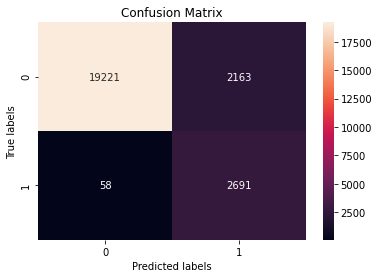

In [ ]:
cm=confusion_matrix(y_test,svm_classifier.predict(X_test))
   
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

Metrics on the trainning set :

In [ ]:
print("the MCC is :", matthews_corrcoef(y_train_miss, svm_classifier.predict(X_train_miss)))
print("the AUC is :", roc_auc_score(y_train_miss, svm_classifier.predict(X_train_miss)))
print("the accuracy is :", accuracy_score(y_train_miss, svm_classifier.predict(X_train_miss)))

the MCC is : 0.9801248629604048
the AUC is : 0.9900409276944065
the accuracy is : 0.9900409276944065
